In [1]:
import os
import glob
import pandas as pd
import numpy as np

# find all csv-files

In [2]:
folder_path = '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20'  # Replace with your folder path

#creating output file name suffix
suffix = folder_path.split('/')[-1].replace('size','')

# Find all matching CSV files
pattern = os.path.join(folder_path, '**', 'mmc_Cathode*.csv')
files = glob.glob(pattern, recursive=True)
no_files = len(files)
print(files)

['/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/01/mmc_Cathode_50.0%_2000K.csv', '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/02/mmc_Cathode_50.0%_2000K.csv', '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/03/mmc_Cathode_50.0%_2000K.csv', '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/04/mmc_Cathode_50.0%_2000K.csv', '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/05/mmc_Cathode_50.0%_2000K.csv', '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/06/mmc_Cathode_50.0%_2000K.csv', '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/07/mmc_Cathode_50.0%_2000K.csv', '/nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/08/mmc_Cathode_50.0%_2000K.csv']


# Collecting and comparing Data of MMC

In [3]:
energy_per_site_end = np.array([])
for i, file in enumerate(files, 1):
    if not os.path.isfile(file):
        print(f"Skipping non-file: {file}")
        continue

    print(f"Processing file: {i}/{no_files} {file}")

    # Read the CSV file with tab separator
    df_file = pd.read_csv(file, sep=r',\s+', engine='python')

    energy_per_site_end = np.concatenate((energy_per_site_end, [float(df_file['energy[eV]/site'].iloc[-1])]))

print(energy_per_site_end)

with open(f'{folder_path}/energy_per_site_end{suffix}.txt', 'w') as f:
    f.write(f'Energy/site:\t{list(enumerate(energy_per_site_end))}\n')
    f.write(f'Mean:\t{np.mean(energy_per_site_end):e} eV\n')
    f.write(f'Median:\t{np.median(energy_per_site_end):e} eV\n')
    f.write(f'St_Dev:\t{np.std(energy_per_site_end):e} eV\n')
    f.write(f'Min:\t{np.min(energy_per_site_end):e} eV\tfile: \t {files[np.argmin(energy_per_site_end)].replace(folder_path, "")}\n')
    f.write(f'Max:\t{np.max(energy_per_site_end):e} eV\tfile: \t {files[np.argmax(energy_per_site_end)].replace(folder_path, "")}\n')


Processing file: 1/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/01/mmc_Cathode_50.0%_2000K.csv
Processing file: 2/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/02/mmc_Cathode_50.0%_2000K.csv
Processing file: 3/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/03/mmc_Cathode_50.0%_2000K.csv
Processing file: 4/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/04/mmc_Cathode_50.0%_2000K.csv
Processing file: 5/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/05/mmc_Cathode_50.0%_2000K.csv
Processing file: 6/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/06/mmc_Cathode_50.0%_2000K.csv
Processing file: 7/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/07/mmc_Cathode_50.0%_2000K.csv
Processing file: 8/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/08/mmc_Cathode_50.0%_2000K.csv
[-0.01753974 -0.0174775  -0.01748512 -0.01744034 -0.0175714  -0.01761906
 -0.017

# Energy over MC step

Processing file: 1/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/01/mmc_Cathode_50.0%_2000K.csv
Processing file: 2/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/02/mmc_Cathode_50.0%_2000K.csv
Processing file: 3/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/03/mmc_Cathode_50.0%_2000K.csv
Processing file: 4/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/04/mmc_Cathode_50.0%_2000K.csv
Processing file: 5/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/05/mmc_Cathode_50.0%_2000K.csv
Processing file: 6/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/06/mmc_Cathode_50.0%_2000K.csv
Processing file: 7/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/07/mmc_Cathode_50.0%_2000K.csv
Processing file: 8/8 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_20_10_20/08/mmc_Cathode_50.0%_2000K.csv


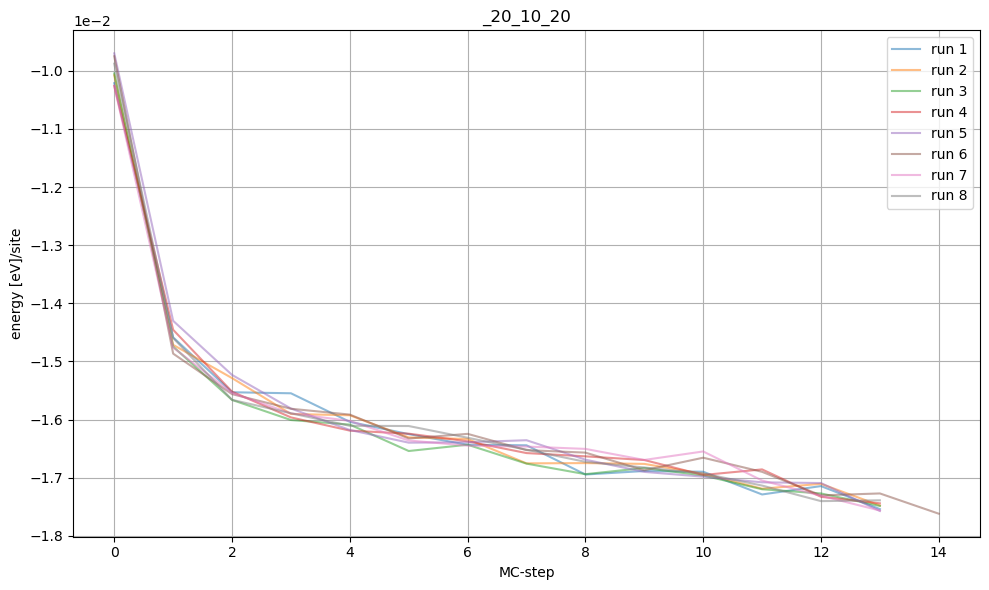

In [7]:
energies_per_site = []
for i, file in enumerate(files, 1):
    if not os.path.isfile(file):
        print(f"Skipping non-file: {file}")
        continue

    print(f"Processing file: {i}/{no_files} {file}")

    # Read the CSV file with tab separator
    df_file = pd.read_csv(file, sep=r',\s+', engine='python')

    energies_per_site.append(df_file['energy[eV]/site'].astype(float).values)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for idx, energy_array in enumerate(energies_per_site):
    plt.plot(energy_array, label=f'run {idx+1}', alpha=0.5)

# Calculate mean and std
#mean_energy = np.mean(np.vstack([arr for arr in energies_per_site if arr.size > 0]), axis=0)
#std_energy = np.std(np.vstack([arr for arr in energies_per_site if arr.size > 0]), axis=0)

#steps = np.arange(len(mean_energy))
#plt.plot(steps, mean_energy, color='black', label='Mean')
#plt.fill_between(steps, mean_energy - std_energy, mean_energy + std_energy, color='gray', alpha=0.3, label='Std Dev')

# Set y-axis to scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.grid(True)
plt.xlabel('MC-step')
plt.ylabel('energy [eV]/site')
plt.title(suffix)
plt.legend()
plt.tight_layout()
plt.savefig(f'{folder_path}/energy_per_site{suffix}.png', dpi=300)
plt.show()  

In [5]:
# Initialize with an empty list (not an empty array)
energies_per_site = []

for i, file in enumerate(files, 1):
    if not os.path.isfile(file):
        print(f"Skipping non-file: {file}")
        continue

    print(f"Processing file: {i}/{no_files} {file}")

    # Read the CSV file with tab separator
    df_file = pd.read_csv(file, sep=',\t', engine='python')
    
    # Convert column to float array and append as a new element
    energy_array = df_file['energy[eV]/site'].astype(float).values
    energies_per_site.append(energy_array)

# Convert to NumPy array of arrays if needed
energies_per_site = np.array(energies_per_site, dtype=object)

print(f"Number of files processed: {len(energies_per_site)}")
print(f"Shape of nested array: {energies_per_site.shape}")
print(f"Length of first file's energy array: {len(energies_per_site[0])}")

Processing file: 1/10 /nfshome/winkelmann/CathodeSimulationResults/MMC/size_10_5_3_25K-steps/01/mmc_Cathode_50.0%_2000K.csv


KeyError: 'energy[eV]/site'